In [1]:
from coreml.image_recognition import *
from uikit.ui_uiimage_convert import *
from PIL import Image
import numpy as np

{'label': 'chimpanzee, chimp, Pan troglodytes', 'confidence': 0.1404230296611786}


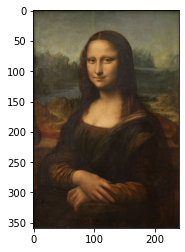

In [2]:
pil_img = Image.open("Mona_Lisa.jpg")

from matplotlib import pylab as plt
plt.imshow(np.array(pil_img))

if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://docs-assets.developer.apple.com/coreml/models/MobileNet.mlmodel',
        'mobilenet.mlmodel',
        os.getcwd()+'/models/')
    result = classify_image(vn_model, pil_img)
    if result:
        print(result)
    else:
        print('画像分類できませんでした')

<VNCoreMLFeatureValueObservation: 0x2826bd680> C2E36CA4-CC2B-4B40-8440-5D72F0285520 VNCoreMLRequestRevision1 confidence=1.000000 "heatmap" - "MultiArray : Double 17 × 65 × 65 array" (1.000000)


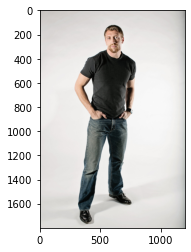

In [11]:
from coreml.image_recognition import *
from uikit.ui_uiimage_convert import *
from PIL import Image
import numpy as np

pil_img = Image.open("brett_lark_cancer_cure_pose_healing_healthy_male.jpg")

from matplotlib import pylab as plt
plt.imshow(np.array(pil_img))

if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://ml-assets.apple.com/coreml/models/\
         Image/PoseEstimation/PoseNet/PoseNetMobileNet100S8FP16.mlmodel',
        'PoseNetMobileNet100S8FP16.mlmodel',
        os.getcwd()+'/models/')
    result =  performRequests_image(vn_model, pil_img)
    if not result:
        print('処理できませんでした')

[17, 65, 65]


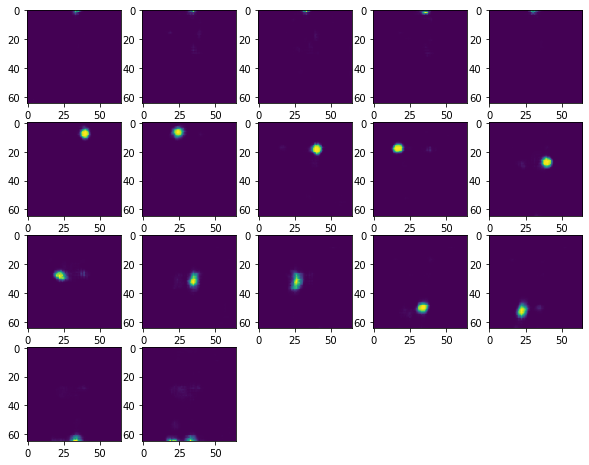

In [13]:
multi_array = result[1].featureValue().multiArrayValue()
[key, height, width] = [i.integerValue() for i in multi_array.shape()]

positions = []

print([key, height, width])
plt.figure(figsize=(10,10))
for k in range(key):
    heat_map = np.empty([height,width])
    for h in range(height):
        for w in range(width):
            index = 0
            index = index + k * multi_array.strides()[0].integerValue()
            index = index + h * multi_array.strides()[1].integerValue()
            index = index + w * multi_array.strides()[2].integerValue()
            heat_map[h,w] = multi_array.objectAtIndexedSubscript_(index).doubleValue()
    positions.append(np.unravel_index(np.argmax(heat_map),
                                      heat_map.shape) )
    plt.subplot(5,5,k+1)
    plt.imshow(heat_map)

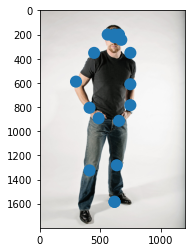

In [29]:
fig, ax = plt.subplots(1)
ax.imshow(np.array(pil_img))

[h,w,_] = np.array(pil_img).shape

from matplotlib.patches import Circle
for pos in positions:
    ax.add_patch(
        Circle( (pos[1]*w/64, pos[0]*h/64/1.3+200), 50) )

(
    "<VNCoreMLFeatureValueObservation: 0x283015aa0> C0F9E001-0942-478A-BF94-64D04DC782ED VNCoreMLRequestRevision1 confidence=1.000000 \"depthmap\" - \"MultiArray : Double 1 \U00d7 128 \U00d7 160 array\" (1.000000)"
)


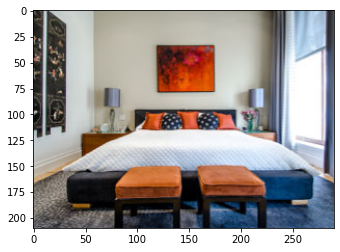

In [2]:
#img = photos.capture_image()

pil_img = Image.open("DepthPrediction.jpg")

from matplotlib import pylab as plt
plt.imshow(np.array(pil_img))

if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://ml-assets.apple.com/coreml/models/Image/DepthEstimation/FCRN/FCRNFP16.mlmodel',
        'FCRNFP16.mlmodel',
        os.getcwd()+'/models/')
    result =  performRequests_image(vn_model, pil_img)
    if result:
        print(result)
    else:
        print('処理できませんでした')

In [5]:
print(result[0].featureValue().multiArrayValue().shape())
print(result[0].featureValue().multiArrayValue())

print(result[0].featureValue().multiArrayValue().strides()[0].integerValue())

multi_array = result[0].featureValue().multiArrayValue()
[_, height, width] = [i.integerValue() for i in result[0].featureValue().multiArrayValue().shape()]
depth_map = np.empty([height,width])
for h in range(height):
    for w in range(width):
        index = 0
        index = index + 0 * multi_array.strides()[0].integerValue()
        index = index + h * multi_array.strides()[1].integerValue()
        index = index + w * multi_array.strides()[2].integerValue()
        depth_map[h,w] = multi_array.objectAtIndexedSubscript_(index).doubleValue()

(
    1,
    128,
    160
)
Double 1 × 128 × 160 array
20480


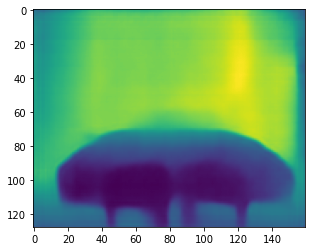

In [6]:
plt.imshow(depth_map)